# Applied Stochastic Processes (30515) - Assignment 3

Andrea Lisci

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg
import seaborn as sns
import random 
from scipy.sparse import csr_matrix

## Part II

### Simulate the process for jumps

In [219]:
X = [0]
t = [0]
j = [0]
T = [0]

In [220]:
N = 100
for i in range(0,N):
    if X[i]==0:
        tup = np.random.exponential(48)
        X.append(1)
        T.append(tup)
    elif X[i] == 1:
        tup = np.random.exponential(48)
        tdown = np.random.exponential(72)
        if tup < tdown:
            X.append(2)
            T.append(tup)
            arrivals = arrivals +1
            time_in_1 = time_in_1 + tup
        else:
            X.append(0)
            T.append(tdown)
            time_in_1 = time_in_1 + tdown
    elif X[i] == 2:
        tup = np.random.exponential(48)
        tdown = np.random.exponential(72/2)
        if tup < tdown:
            X.append(3)
            T.append(tup)
            arrivals = arrivals +1
            time_in_2 = time_in_2 + tup
        else:
            X.append(1)
            T.append(tdown)
            time_in_2 = time_in_2 + tdown
    elif X[i] == 3:
        tup = np.random.exponential(48)
        tdown = np.random.exponential(72/3)
        if tup < tdown:
            X.append(4)
            T.append(tup)
            arrivals = arrivals +1
            time_in_3 = time_in_3 + tup
        else:
            X.append(2)
            T.append(tdown)
            time_in_3 = time_in_3 + tdown
    elif X[i]==4:
        tdown = np.random.exponential(72/4)
        X.append(3)
        j.append(tdown)
        T.append(tdown)

### Provide the plot of a typical trajectory of the process

In [221]:
T_cumulated = np.cumsum(T)

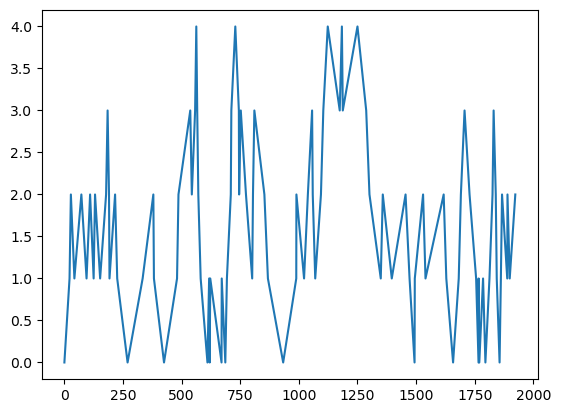

In [222]:
plt.plot(T_cum,X)

### Now set a higher (e.g. ) and use the simulated process to solve (again) the following:

In [223]:
X = [0]
t = [0]
j = [0]
T = [0]
time_in_0 = 0
time_in_1 = 0
time_in_2 = 0
time_in_3=0
time_in_4 = 0
counter = 0
arrivals = 0

In [224]:
N = 100000
for i in range(0,N):
    if X[i]==0:
        tup = np.random.exponential(48)
        X.append(1)
        t.append(tup)
        T.append(tup)
        arrivals = arrivals +1
        time_in_0 = time_in_0 +tup
    elif X[i] == 1:
        tup = np.random.exponential(48)
        tdown = np.random.exponential(72)
        if tup < tdown:
            X.append(2)
            t.append(tup)
            T.append(tup)
            arrivals = arrivals +1
            time_in_1 = time_in_1 + tup
        else:
            X.append(0)
            j.append(tdown)
            T.append(tdown)
            time_in_1 = time_in_1 + tdown
    elif X[i] == 2:
        tup = np.random.exponential(48)
        tdown = np.random.exponential(72/2)
        if tup < tdown:
            X.append(3)
            t.append(tup)
            T.append(tup)
            arrivals = arrivals +1
            time_in_2 = time_in_2 + tup
        else:
            X.append(1)
            j.append(tdown)
            T.append(tdown)
            time_in_2 = time_in_2 + tdown
    elif X[i] == 3:
        tup = np.random.exponential(48)
        tdown = np.random.exponential(72/3)
        if tup < tdown:
            X.append(4)
            t.append(tup)
            T.append(tup)
            arrivals = arrivals +1
            time_in_3 = time_in_3 + tup
        else:
            X.append(2)
            j.append(tdown)
            T.append(tdown)
            time_in_3 = time_in_3 + tdown
    if X[i]==4:
        tdown = np.random.exponential(72/4)
        tup = np.random.exponential(48)
        X.append(3)
        j.append(tdown)
        T.append(tdown)
        time_in_4 = time_in_4 + tdown
        wait_bef_dep = tup
        while wait_bef_dep < tdown:
            tup_2 = np.random.exponential(48)
            counter = counter +1
            arrivals = arrivals +1
            wait_bef_dep = wait_bef_dep + tup_2

### Estimate the proportion of time the hospital unit is empty

In [225]:
empty = time_in_0/sum(T)
empty

0.22377646997990516

### Estimate the average number of patients in the hospital unit

In [226]:
states = [0,1,2,3,4]
times_in = [time_in_0,time_in_1,time_in_2,time_in_3,time_in_4]
prop = 0
for i in states:
    prop=prop + i*times_in[i]/sum(T)
prop

1.4388401773911703

### Estimate the proportion of patients that have to be turned to other hospital

In [227]:
turned = counter/arrivals
turned

0.04870531382584045